In [155]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [5]:
df = pd.read_csv('dataset/corporacion-favorit/store44.csv', index_col='date', parse_dates=True)
df.head()


,id,store_nbr,family,quantity,onpromotion
date,,,,,
2013-01-02,3036,44,AUTOMOTIVE,16.000,0
2013-01-02,3068,44,SEAFOOD,150.367,0
2013-01-02,3065,44,PREPARED FOODS,616.862,0
2013-01-02,3064,44,POULTRY,1034.765,0
2013-01-02,3061,44,PERSONAL CARE,716.000,0


In [66]:
min(df.index)
max(df.index)
i = int(0.6 * len(df.index))
df.iloc[i]


id              1943641
store_nbr            44
family         CLEANING
quantity         2840.0
onpromotion           4
Name: 2015-12-30 00:00:00, dtype: object

In [80]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [180]:
def calling_arima(df,family, order=(1,0,2), metrics=True):
    fdf = df[df['family'] == family].copy()
    fdf = fdf.asfreq('ME')
    
    #X = fdf.drop(columns={'id','store_nbr','family'})
    y = pd.to_numeric(fdf['quantity'], errors='coerce')

    #X_train = X[X.index < '2016-10-24']
    #X_test = X[X.index >= '2016-10-24']
    y_train = y[y.index < '2016-11-24']
    y_test = y[y.index >= '2016-11-24']

    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(y_test))

    #model2 = ExponentialSmoothing(y_train,trend='additive')
    #fit_model = model2.fit()

    #fit_model.summary()
    #predictions = fit_model.predict(len(y_test))
    



    if metrics:
    # Calculate performance metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
                                            
        print(f'MSE: {mse}')
        print(f'RMSE: {rmse}')
        print(f'MAPE: {mape}')
        print(f'R²: {r2}')

        return model_fit, y_test, predictions, mse, rmse, mape, r2
    else:
        return model_fit, predictions

In [181]:
model_fit, y_test,predictions, mse, rmse, mape, r2 = calling_arima(df, family='GROCERY I')

MSE: 7187437.839702824
RMSE: 2680.9397307106374
MAPE: 0.16069748585893476
R²: -1.1108060857087656


In [182]:
predictions.values

array([8737.49596328, 9996.74816923, 9110.24566772, 9573.69026553,
       9331.41131553, 9458.06958254, 9391.85534229, 9426.47073468,
       9408.37454592])

In [183]:
df_compare = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': predictions.values
}, index=y_test.index)

In [184]:
df_compare 

,y_test,y_pred
date,,
2016-11-30,11083.0,8737.495963
2016-12-31,11226.0,9996.748169
2017-01-31,8936.0,9110.245668
2017-02-28,14400.0,9573.690266
2017-03-31,12173.0,9331.411316
2017-04-30,14442.0,9458.069583
2017-05-31,9829.0,9391.855342
2017-06-30,10411.0,9426.470735
2017-07-31,9934.0,9408.374546


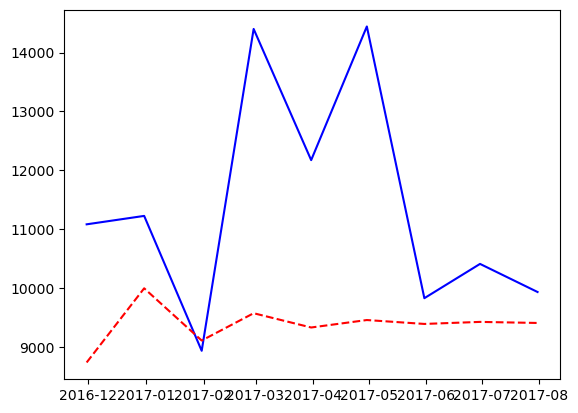

In [178]:
plt.plot(df_compare.index, df_compare['y_test'], label='Dados Reais', color='blue')

# Plotar as previsões
plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

In [150]:
from prophet import Prophet